The first thing we need to implement for the island method is a function to virtually
raise the water level. The function below takes a graph, and applies a threshold (“water
level”), letting all edges above a certain value through, and removing all others. Don’t
worry—it returns a copy of the original graph, so it’s non-destructive:

In [1]:
def trim_edges(g, weight=1):
    g2 = net.Graph
    for f,to,edata in g.edges(data = True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2


Now, let’s define how the water level should be raised. We will compute evenly spaced
thresholds and produce a list of networks at each water level:

In [2]:
def island_method(g, iterations=5):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    #compute the size of the step, so we get a reasonable step in iterations
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

In [4]:
import networkx as net
e = net.read_pajek(r"C:\Users\piush\Desktop\Dataset\SNABook-master\chapter1\egypt_retweets.net")

In [5]:
len(e)

25178

In [28]:
lenE = max(net.connected_component_subgraphs(e), key = len) # list because it returns a generator
lenE
#[len(c) for c in net.connected_component_subgraphs(e)]

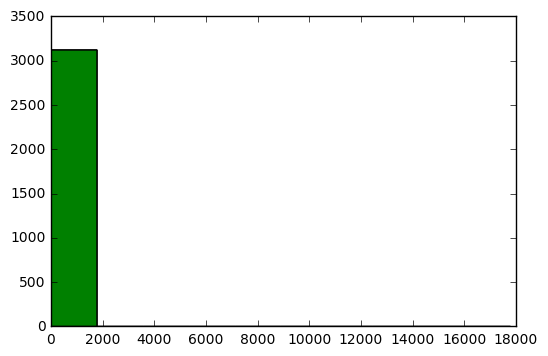

In [13]:
import matplotlib.pyplot as plot
x=[len(c) for c in net.connected_component_subgraphs(e)]
plot.hist(x)
plot.show()

In [18]:
[len(c) for c in net.connected_component_subgraphs(e) if len(c) > 10]

[17762, 14, 64, 11, 11, 16, 16, 13]

In [31]:
cc=net.connected_component_subgraphs(e)[0]
islands=island_method(cc)

TypeError: 'generator' object is not subscriptable